# Positional Encoding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right), \quad PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right)
$$

In [24]:
# The positional encoding from the transformer paper
def positional_encoding(seq_length, d_model):

    pos = np.arange(seq_length).reshape((-1,1))  # Shape (seq_length, 1)
    i = np.arange(d_model).reshape((1,-1))  # Shape (1, d_model)

    # Compute angles using the formula from the Transformer paper
    div_term = 1/10000**(2*(i/2)/d_model)

    # Apply sine to even indices, cosine to odd indices
    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(pos * div_term[:, 0::2])  # Even indices (sin)
    pe[:, 1::2] = np.cos(pos * div_term[:, 1::2])  # Odd indices (cos)

    # This is the one we'd use for the diffusion model
    # pe_sin = np.sin(pos * div_term[:, 0::2])
    # pe_cos = np.cos(pos * div_term[:, 1::2])
    # pe = np.concatenate((pe_sin, pe_cos), axis=1)

    return pe

In [25]:
# Define sequence length and embedding dimension
seq_length = 100
d_model = 512

# Compute positional encodings
pe = positional_encoding(seq_length, d_model)

In [37]:
pe[10]

array([-0.54402111, -0.22002319,  0.11877648,  0.43307962,  0.69263418,
        0.87775326,  0.97917478,  0.99677517,  0.93763274,  0.81385521,
        0.64047802,  0.43363106,  0.209077  , -0.01884882, -0.23791768,
       -0.43835708, -0.61293676, -0.75685937, -0.86751982, -0.9441876 ,
       -0.98765599, -0.99989048, -0.98369919, -0.94243938, -0.87976724,
       -0.79943351, -0.70512336, -0.60033714, -0.48830695, -0.37194363,
       -0.25380851, -0.13610474, -0.02068353,  0.09093895,  0.1975573 ,
        0.2982481 ,  0.39233892,  0.47937669,  0.5590967 ,  0.63139326,
        0.69629241,  0.7539271 ,  0.80451509,  0.84833944,  0.88573157,
        0.91705685,  0.94270241,  0.96306696,  0.97855249,  0.98955763,
        0.99647233,  0.99967382,  0.99952357,  0.99636516,  0.99052283,
        0.98230064,  0.97198213,  0.95983035,  0.94608816,  0.93097887,
        0.91470688,  0.89745863,  0.87940351,  0.86069486,  0.84147098,
        0.82185619,  0.8019618 ,  0.78188711,  0.76172041,  0.74

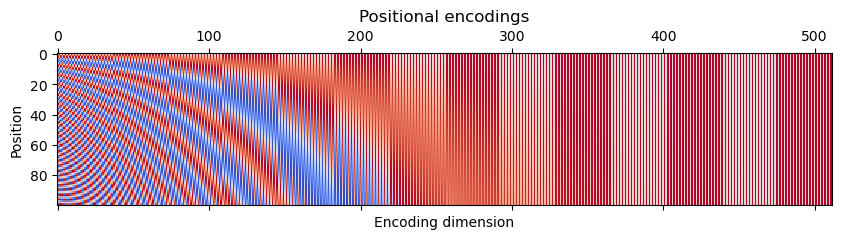

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(pe, cmap='coolwarm')
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('Positional encodings')
plt.show()

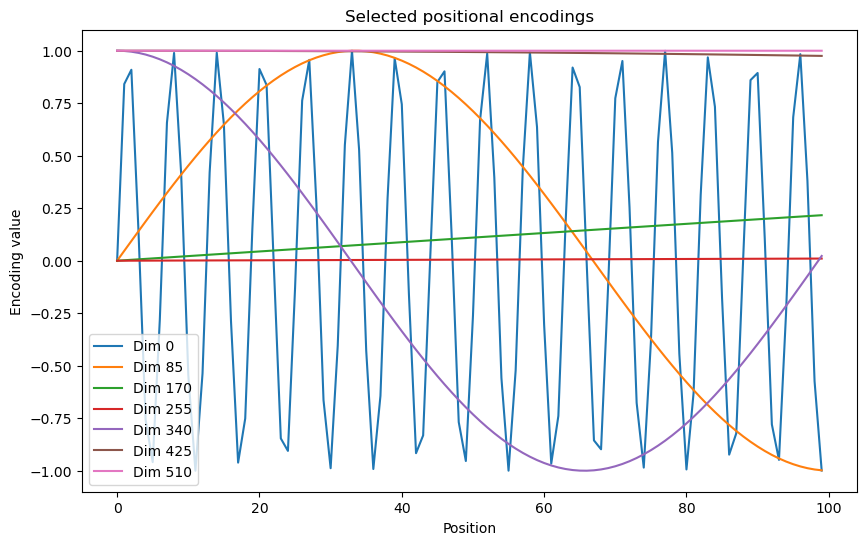

In [40]:
# Plot the positional encodings for some of the embedding dimensions
plt.figure(figsize=(10, 6))
for i in range(0,d_model, d_model//6):
    plt.plot(pe[:, i], label=f'Dim {i}')
plt.xlabel('Position')
plt.ylabel('Encoding value')
plt.title('Selected positional encodings')
plt.legend()
plt.show()

In [28]:
print(f'Shape of positional encoding: {pe.shape}')

Shape of positional encoding: (100, 512)


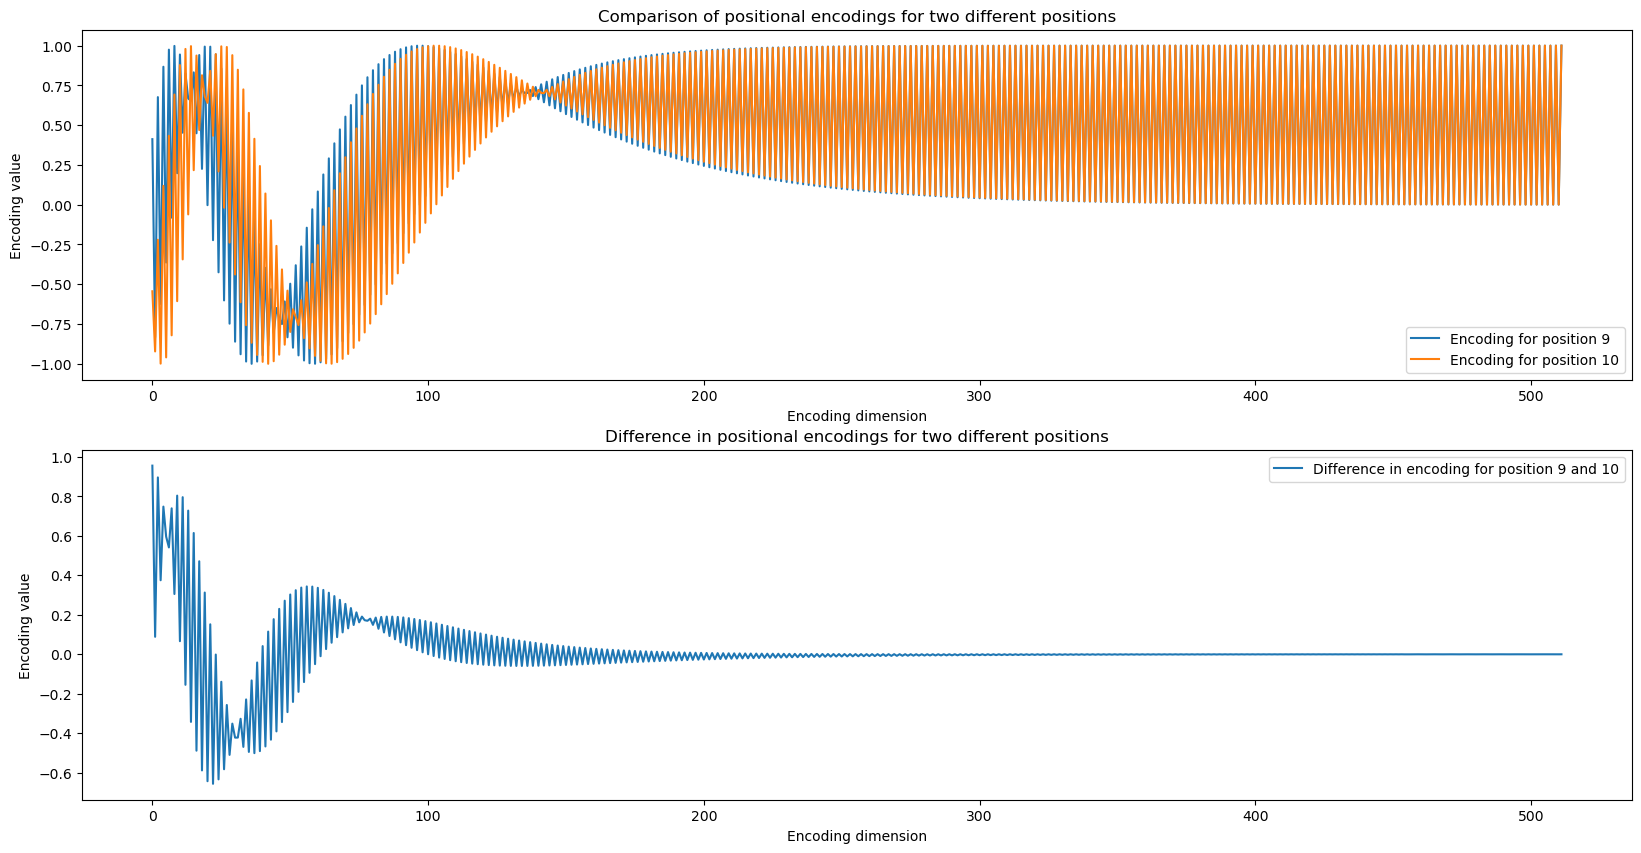

In [29]:
# Compare two positions
pos_1, pos_2 = 9, 10

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(pe[pos_1, :], label=f'Encoding for position {pos_1}')
plt.plot(pe[pos_2, :], label=f'Encoding for position {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Comparison of positional encodings for two different positions')
plt.legend()

plt.subplot(212)
plt.plot(pe[pos_1, :]-pe[pos_2, :], label=f'Difference in encoding for position {pos_1} and {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Difference in positional encodings for two different positions')
plt.legend()


plt.show()

In [30]:
# The positional encoding from the transformer paper
def positional_encoding(seq_length, d_model):

    pos = np.arange(seq_length).reshape((-1,1))  # Shape (seq_length, 1)
    i = np.arange(d_model).reshape((1,-1))  # Shape (1, d_model)

    # Compute angles using the formula from the Transformer paper
    div_term = 1/10000**(2*(i/2)/d_model)

    # Apply sine to even indices, cosine to odd indices
    # pe = np.zeros((seq_length, d_model))
    # pe[:, 0::2] = np.sin(pos * div_term[:, 0::2])  # Even indices (sin)
    # pe[:, 1::2] = np.cos(pos * div_term[:, 1::2])  # Odd indices (cos)

    # This is the one we'd use for the diffusion model
    pe_sin = np.sin(pos * div_term[:, 0::2])
    pe_cos = np.cos(pos * div_term[:, 1::2])
    pe = np.concatenate((pe_sin, pe_cos), axis=1)

    return pe

## Sinusoidal functions

$PE_{\text{sin}}(pos) = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right)$, $PE_{\text{cos}}(pos) = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right)$

Concatenate to -> $PE = \left[ PE_{\text{sin}}(pos) \ | \ PE_{\text{cos}}(pos) \right]$

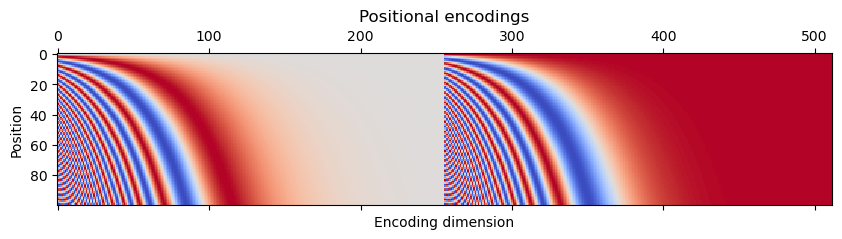

In [31]:
# Define sequence length and embedding dimension
seq_length = 100
d_model = 512

# Compute positional encodings
pe = positional_encoding(seq_length, d_model)

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(pe, cmap='coolwarm')
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('Positional encodings')
plt.show()

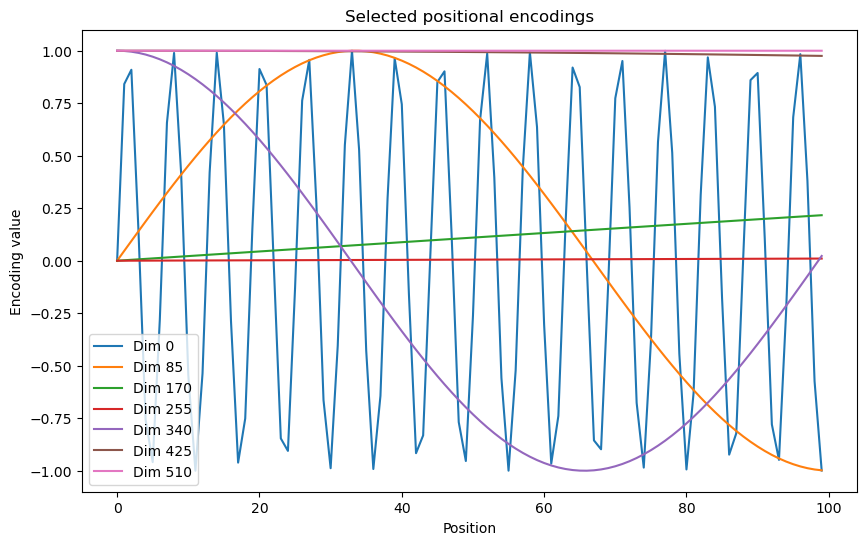

In [32]:
# Plot the positional encodings for some of the embedding dimensions
plt.figure(figsize=(10, 6))
for i in range(0,d_model, d_model//6):
    plt.plot(pe[:, i], label=f'Dim {i}')
plt.xlabel('Position')
plt.ylabel('Encoding value')
plt.title('Selected positional encodings')
plt.legend()
plt.show()

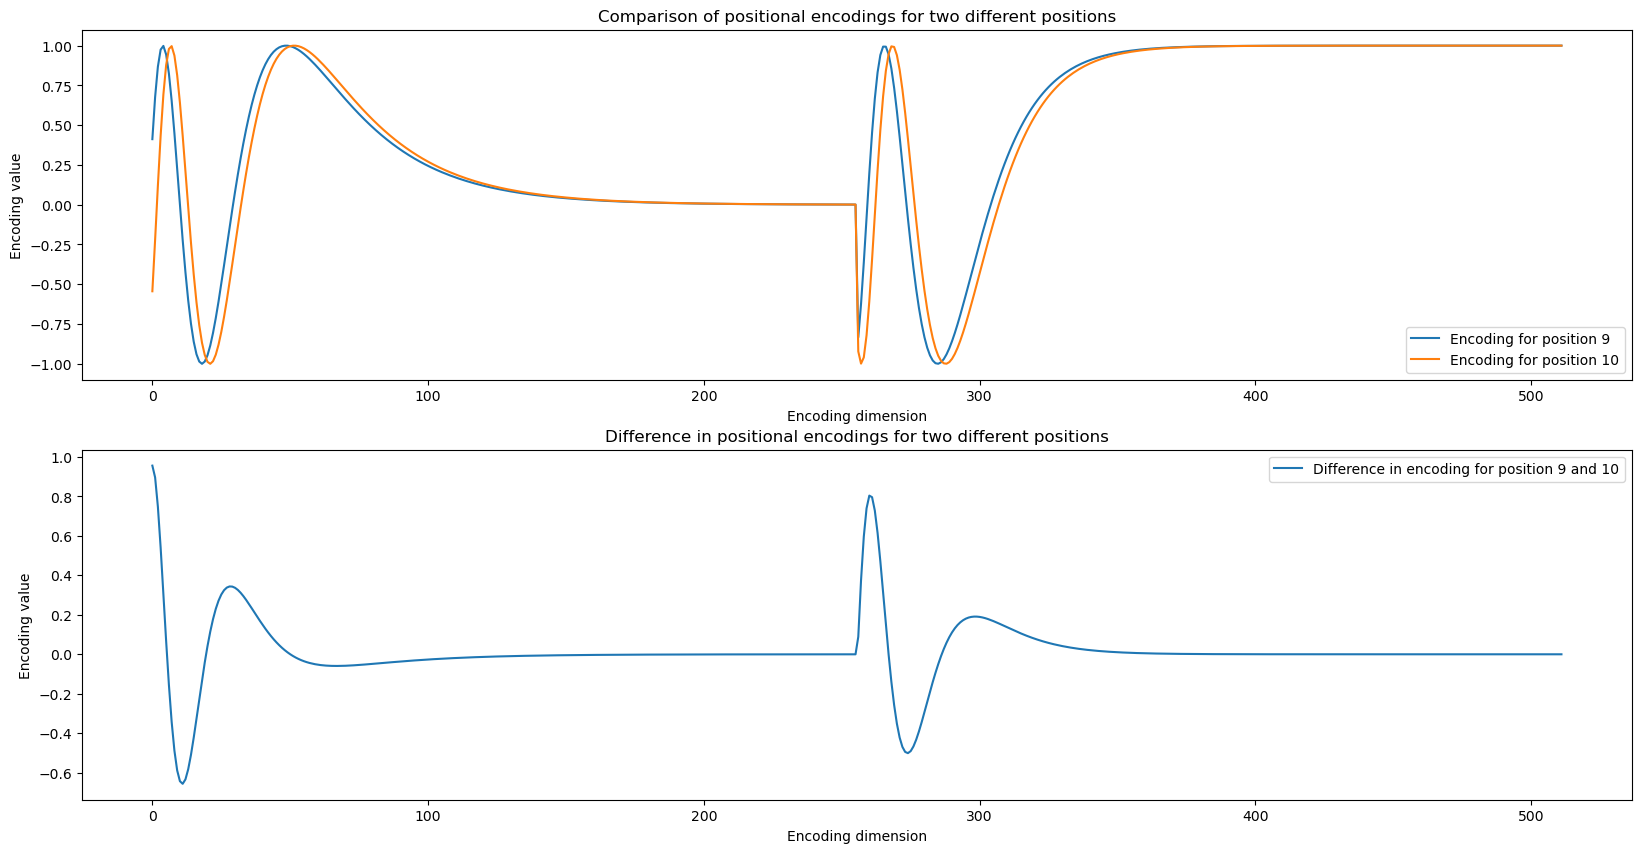

In [33]:
# Compare two positions
pos_1, pos_2 = 9, 10

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(pe[pos_1, :], label=f'Encoding for position {pos_1}')
plt.plot(pe[pos_2, :], label=f'Encoding for position {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Comparison of positional encodings for two different positions')
plt.legend()

plt.subplot(212)
plt.plot(pe[pos_1, :]-pe[pos_2, :], label=f'Difference in encoding for position {pos_1} and {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Difference in positional encodings for two different positions')
plt.legend()


plt.show()